# Analiza ocen smeri v Mišji peči

Spletna stran www.plezanje.net vzdržuje plezalne vodnike vseh večjih slovenskih plezališč in zbira ocene težavnosti, ki jih dajo plezalci smerem v teh plezališčih. V tej projektni nalogi sem analiziral ocene smeri v plezališču Mišja peč.

## Vir podatkov

Vir podatkov je spletna stran www.plezanje.net.

Predpriprava:

In [3]:
import pandas as pd

smeri = pd.read_csv('csv/smeri.csv', index_col = 'id', encoding = 'cp1250')
ocene = pd.read_csv('csv/ocene.csv', index_col = 'id', encoding = 'cp1250')
ocene_lookup = pd.read_csv('csv/ocene_lookup.csv', encoding = 'cp1250')

smeri['ocena'] = pd.Categorical(smeri['ocena'], ['4a', '4a/a+', '4a+', '4a+/b', '4b', '4b/b+', '4b+', '4b+/c', '4c', '4c/c+', '4c+', '4c+/5a', '5a', '5a/a+', '5a+', '5a+/b', '5b', '5b/b+', '5b+', '5b+/c', '5c', '5c/c+', '5c+', '5c+/6a', '6a', '6a/a+', '6a+', '6a+/b', '6b', '6b/b+', '6b+', '6b+/c', '6c', '6c/c+', '6c+', '6c+/7a', '7a', '7a/a+', '7a+', '7a+/b', '7b', '7b/b+', '7b+', '7b+/c', '7c', '7c/c+', '7c+', '7c+/8a', '8a', '8a/a+', '8a+', '8a+/b', '8b', '8b/b+', '8b+', '8b+/c', '8c', '8c/c+', '8c+', '8c+/9a', '9a', '9a/a+', '9a+'])
ocene['ocena'] = pd.Categorical(ocene['ocena'], ['4a', '4a/a+', '4a+', '4a+/b', '4b', '4b/b+', '4b+', '4b+/c', '4c', '4c/c+', '4c+', '4c+/5a', '5a', '5a/a+', '5a+', '5a+/b', '5b', '5b/b+', '5b+', '5b+/c', '5c', '5c/c+', '5c+', '5c+/6a', '6a', '6a/a+', '6a+', '6a+/b', '6b', '6b/b+', '6b+', '6b+/c', '6c', '6c/c+', '6c+', '6c+/7a', '7a', '7a/a+', '7a+', '7a+/b', '7b', '7b/b+', '7b+', '7b+/c', '7c', '7c/c+', '7c+', '7c+/8a', '8a', '8a/a+', '8a+', '8a+/b', '8b', '8b/b+', '8b+', '8b+/c', '8c', '8c/c+', '8c+', '8c+/9a', '9a', '9a/a+', '9a+'])

pd.options.display.max_rows = 20

%matplotlib inline

Tabela vseh smeri v Mišji peči vsebuje imena smeri, njihove ocene, dolžino v metrih

In [4]:
smeri

,ime,ocena,dolzina,vzponi
id,,,,
1441,Slinavka,5a/a+,14,137 (96 plezalcev)
1442,Parkljevka,5b,14,150 (105 plezalcev)
1443,Brbončica,6a+/b,14,134 (90 plezalcev)
1444,Harry Potter,6a+,16,139 (100 plezalcev)
1445,Bradavičarka,6a+,17,128 (87 plezalcev)
1446,Mojčina,5a+,17,163 (104 plezalcev)
1447,Ksenjina,5a,17,151 (100 plezalcev)
1448,Naritko Mitko,5a+/b,17,195 (119 plezalcev)
1449,Lukova,6c,17,170 (90 plezalcev)


Tabela vseh ocen vsebuje ime pripadajoče smeri, oceno in plezalca, ki je prispeval oceno. Oceno lahko prispeva, kdor je splezal smer, uradna ocena pa je povprečje srednjih 60% ocen.

In [5]:
ocene

,smer_id,ime,ocena,plezalec,datum,valid
id,,,,,,
1,1441,Slinavka,4c,Žan Auersperger,29.3.2014,invalid
2,1441,Slinavka,5a,Bazna ocena,NaN,invalid
3,1441,Slinavka,5a,Robert Lakovnik,20.11.2006,invalid
4,1441,Slinavka,5a,Damjan Gruden,9.6.2008,invalid
5,1441,Slinavka,5a,Davor Zupancic,15.8.2008,valid
6,1441,Slinavka,5a,Rajko Zajc,28.10.2008,valid
7,1441,Slinavka,5a,Martin Bombač,16.3.2009,valid
8,1441,Slinavka,5a,Ajda Auersperger,29.3.2014,valid
9,1441,Slinavka,5a,Primož Auersperger,5.10.2014,valid


## Analiza smeri

število smeri glede na oceno:

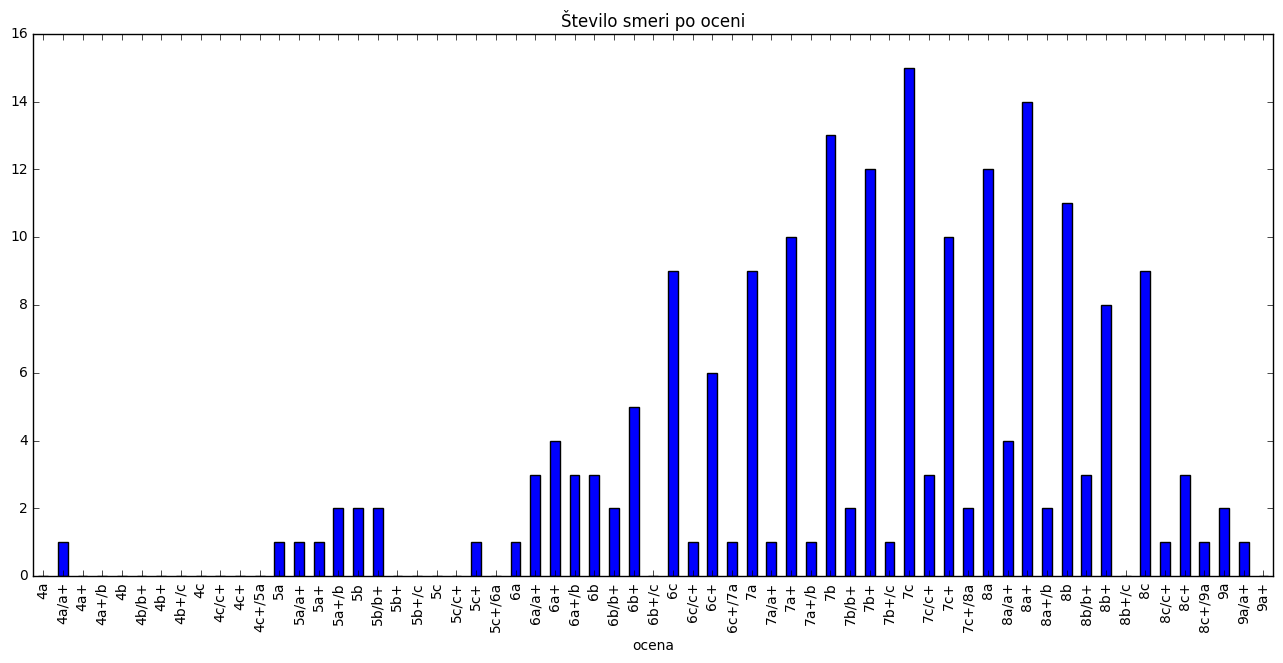

In [6]:
smeri.groupby('ocena').size().plot(kind='bar', figsize=(16, 7), title='Število smeri po oceni')

Graf je pribljižno Gaussova krivulja, pri čemer so "vmesne" ocene, kot 8a+/b, bistveno manj zastopane.

Število ocen za vsako smer:

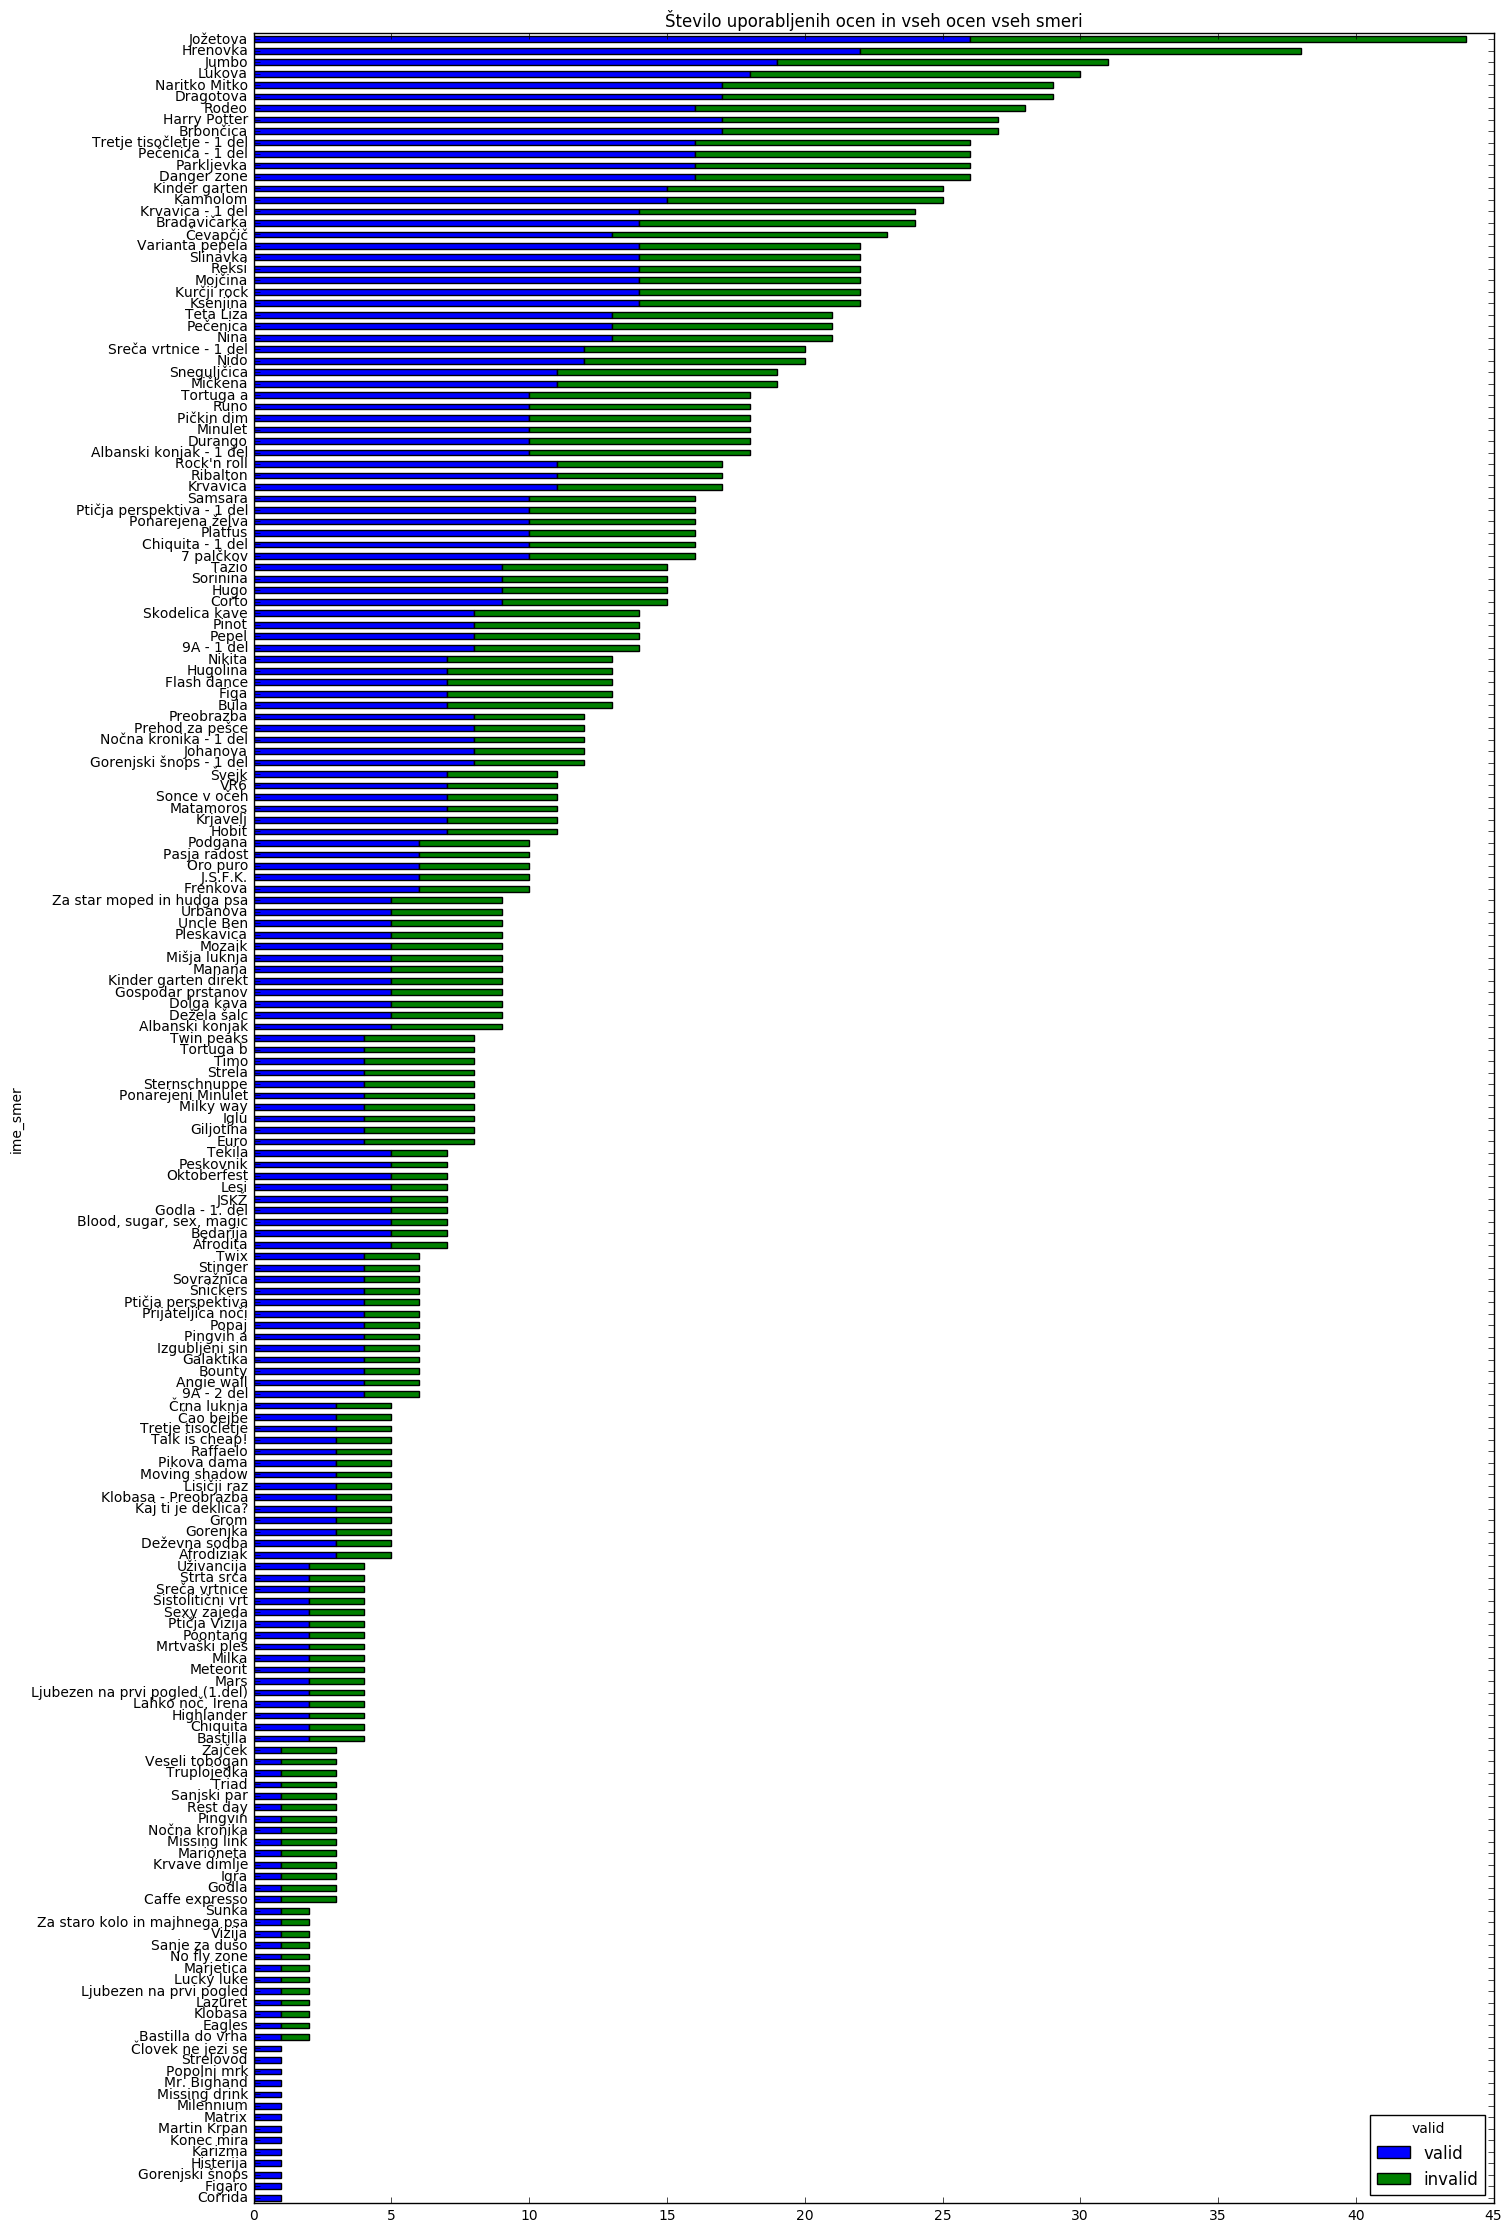

In [7]:
ocene_all = ocene\
    .join(smeri, on='smer_id', rsuffix='_smer')[['ime_smer', 'ocena', 'valid']]\
    .groupby(['ime_smer', 'valid'])\
    .size()\
    .unstack()
    
ocene_all['invalid'].fillna(0, inplace=True)
ocene_all['sum'] = ocene_all['valid'] + ocene_all['invalid']

ocene_all_sorted = ocene_all.sort_values(['sum', 'valid', 'invalid'])[['valid', 'invalid']]

ocene_all_sorted.plot(kind='barh', figsize=(16, 28), title='Število uporabljenih ocen in vseh ocen vseh smeri', stacked=True)

valid so ocene, ki so uporabljene pri izračunu uradne ocene.



Odstopanje ocen od uradne:

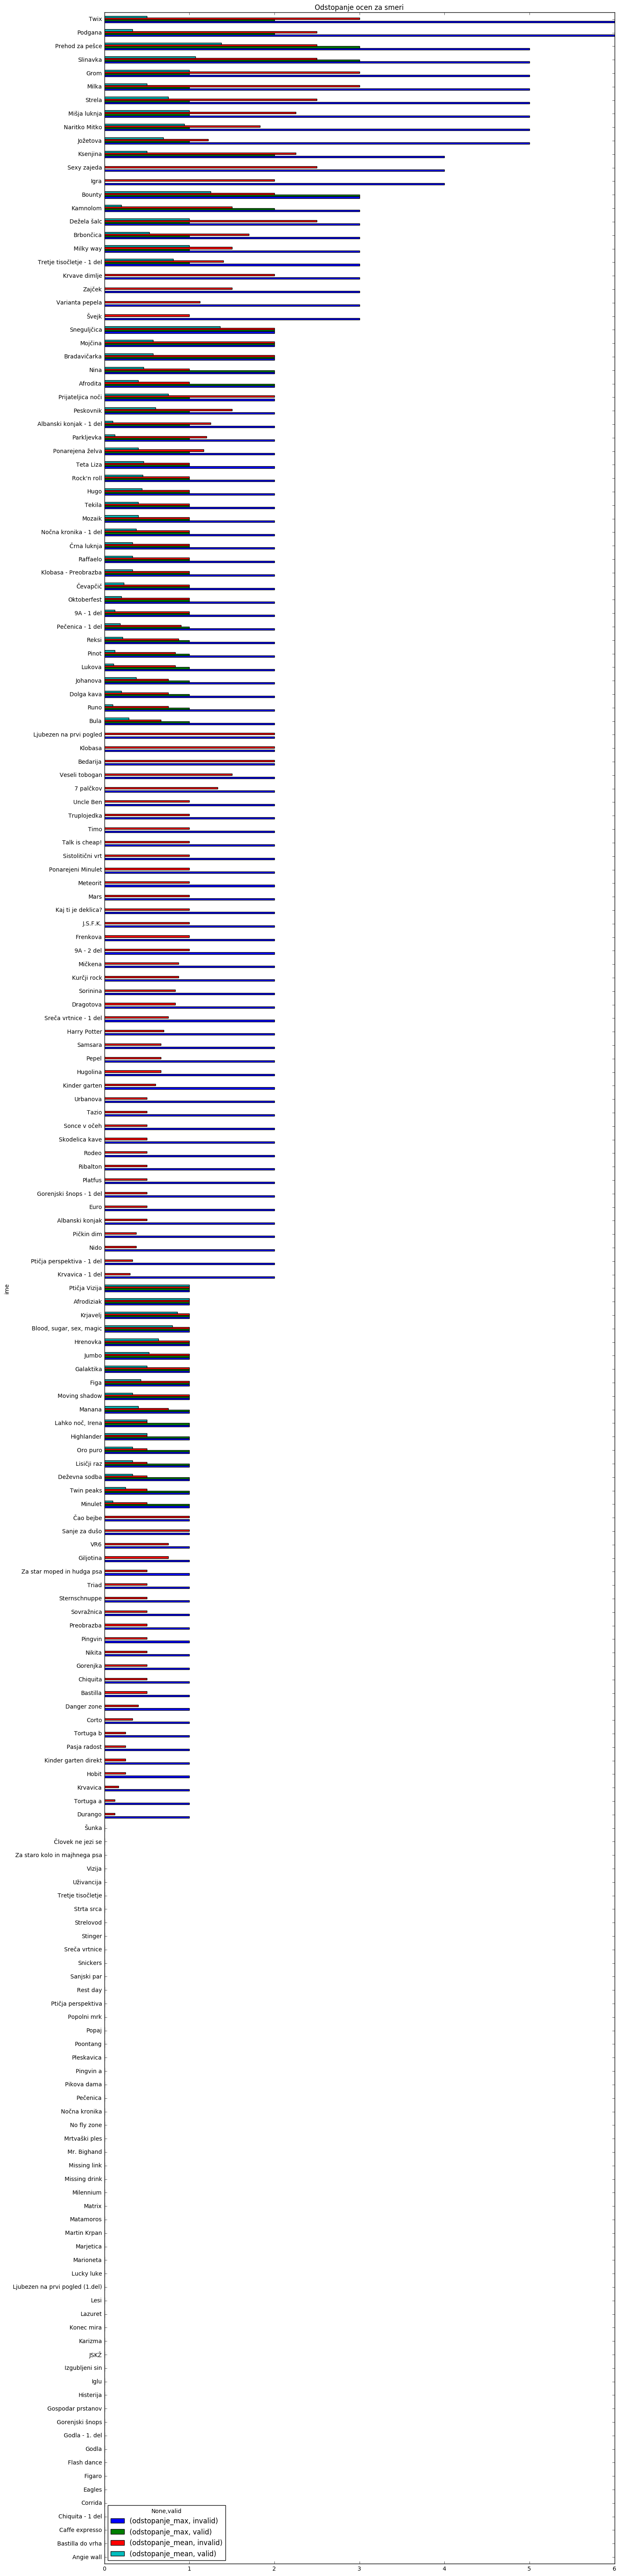

In [8]:
odstopanje = pd.merge(pd.merge(ocene, ocene_lookup), pd.merge(smeri, ocene_lookup), on='ime', suffixes=('_ocena', '_smer'))[['ime', 'num_smer', 'num_ocena', 'valid']]
odstopanje['odstopanje'] = abs(odstopanje['num_smer'] - odstopanje['num_ocena'])

odstopanje_prep = odstopanje[['ime', 'odstopanje', 'valid']]

odstopanje_max = odstopanje_prep\
    .groupby(['ime', 'valid'])\
    .max()\
    .unstack()

odstopanje_mean = odstopanje_prep\
    .groupby(['ime', 'valid'])\
    .mean()\
    .unstack()
    
odstopanje_all = odstopanje_max.join(odstopanje_mean, lsuffix='_max', rsuffix='_mean')

odstopanje_all[('odstopanje_max', 'invalid')].fillna(0, inplace=True)
odstopanje_all[('odstopanje_mean', 'invalid')].fillna(0, inplace=True)

odstopanje_all_sorted = odstopanje_all\
    .sort_values([('odstopanje_max', 'invalid'), ('odstopanje_max', 'valid'), ('odstopanje_mean', 'invalid'), ('odstopanje_mean', 'valid')])

odstopanje_all_sorted.plot(kind='barh', figsize=(16, 80), title='Odstopanje ocen za smeri')

Graf kaže maksimalno in povprečno odstopanje vseh ocen ter maksimalno in povprečno odstopanje ocen, ki se upoštevajo pri izračunu uradne ocene. Odstopanje za 2 je enakovredno razliki med ocenami za en +. kadar je odstopanje enako 0 to pomeni, da so bile vse ocene v tej kategoriji enake uradni oceni.

## Analiza ocenjevalcev

Kako dejavi so bili posamezni ocenjevalci:

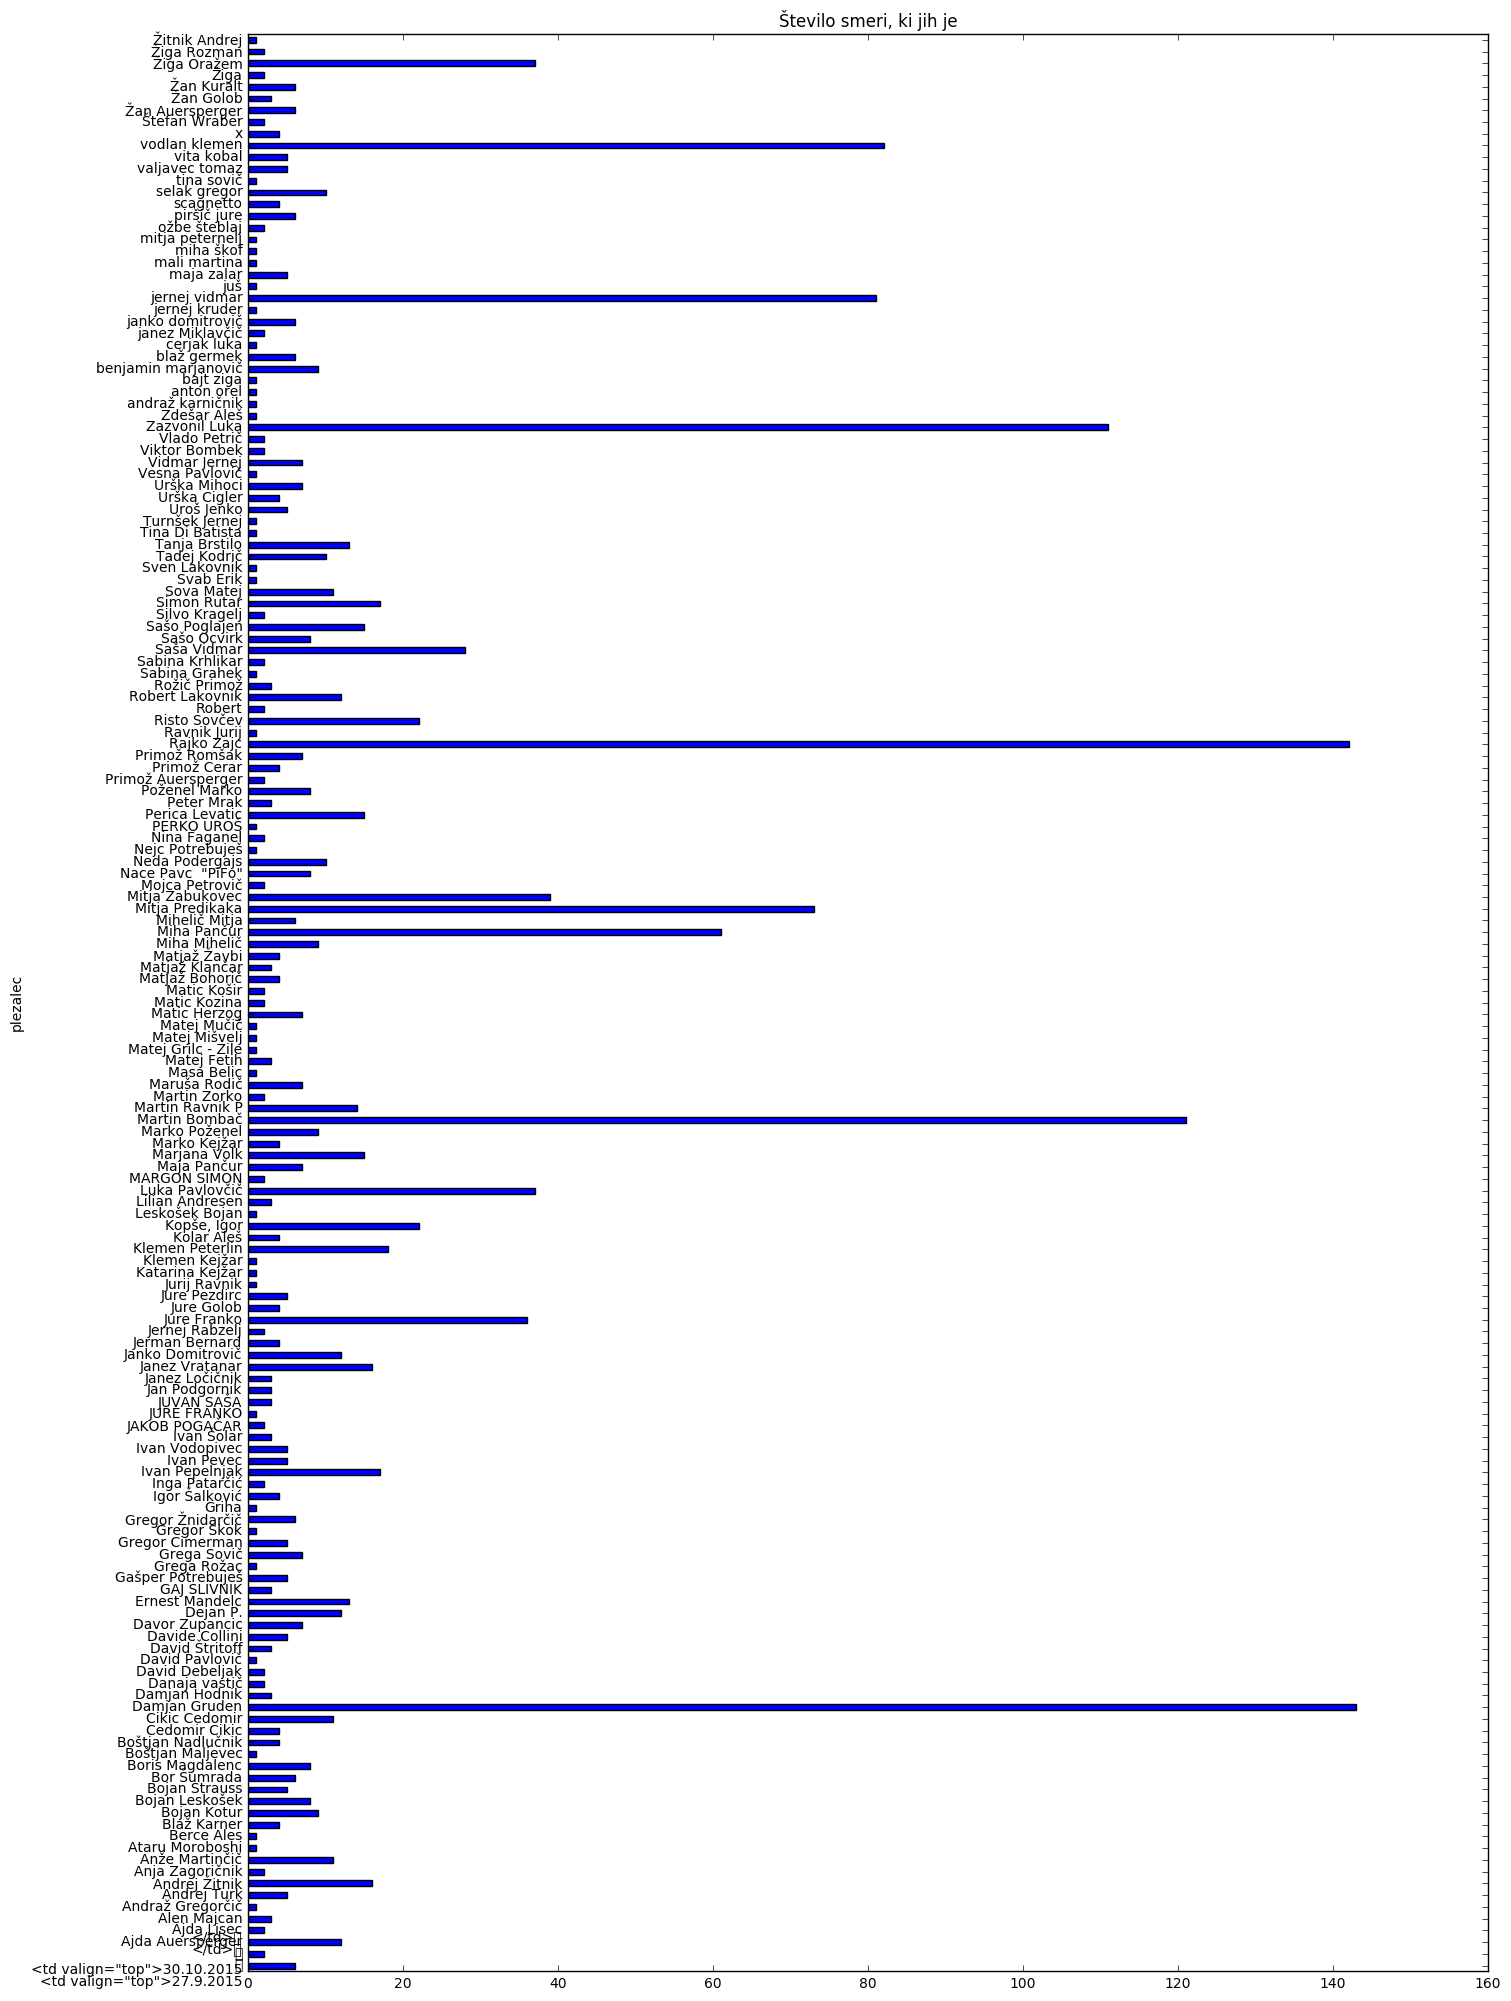

In [13]:
ocene[(ocene['plezalec'] != 'Bazna ocena')].groupby('plezalec').size().plot(kind='barh', figsize=(16, 25), title='Število smeri, ki jih je')

Vse zapise, kjer naj bi bil ocenjevalec "Bazna ocena" sem izpustil, saj je to ocena, ki jo je smer imela, ko ne bila postavljena.